Import bibliotek

In [564]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

Połączenie z bazą danych SQLite

In [565]:
data_path = 'chinook.db'
conn = sqlite3.connect(data_path)

Funkcja do odczytu tabeli z bazy danych do DataFrame

In [566]:
def read_table_to_df(table_name):
    query = f"SELECT * FROM {table_name}"
    return pd.read_sql_query(query, conn)

Lista dostępnych tabel w bazie danych

In [567]:
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)

print("Dostępne tabele w bazie danych:")
print(tables)

Dostępne tabele w bazie danych:
               name
0            albums
1   sqlite_sequence
2           artists
3         customers
4         employees
5            genres
6          invoices
7     invoice_items
8       media_types
9         playlists
10   playlist_track
11           tracks
12     sqlite_stat1


Odczyt tabel do DataFrame

In [568]:
df_customers = read_table_to_df('customers')
df_invoices = read_table_to_df('invoices')
df_invoice_items = read_table_to_df('invoice_items')
df_albums = read_table_to_df('albums')
df_artists = read_table_to_df('artists')
df_tracks = read_table_to_df('tracks')
df_employees = read_table_to_df('employees')
df_genres = read_table_to_df('genres')

Odczyt przykładowej tabeli 'customers'

In [569]:
print("Tabela 'customers':")
print(df_customers.head())

Tabela 'customers':
   CustomerId  FirstName     LastName  \
0           1       Luís    Gonçalves   
1           2     Leonie       Köhler   
2           3   François     Tremblay   
3           4      Bjørn       Hansen   
4           5  František  Wichterlová   

                                            Company  \
0  Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                              None   
2                                              None   
3                                              None   
4                                  JetBrains s.r.o.   

                           Address                 City State         Country  \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP          Brazil   
1          Theodor-Heuss-Straße 34            Stuttgart  None         Germany   
2                1498 rue Bélanger             Montréal    QC          Canada   
3                 Ullevålsveien 14                 Oslo  None          Norway 

Przykład analizy: Liczba klientów w poszczególnych krajach

In [570]:
customers_by_country = df_customers['Country'].value_counts()
print("Liczba klientów w poszczególnych krajach:")
print(customers_by_country)

Liczba klientów w poszczególnych krajach:
Country
USA               13
Canada             8
Brazil             5
France             5
Germany            4
United Kingdom     3
Portugal           2
India              2
Czech Republic     2
Denmark            1
Belgium            1
Austria            1
Finland            1
Ireland            1
Italy              1
Netherlands        1
Poland             1
Spain              1
Sweden             1
Norway             1
Australia          1
Argentina          1
Chile              1
Hungary            1
Name: count, dtype: int64


Odczyt przykładowej tabeli 'invoices'

In [571]:
print("Tabela 'invoices':")
print(df_invoices.head())

Tabela 'invoices':
   InvoiceId  CustomerId          InvoiceDate           BillingAddress  \
0          1           2  2009-01-01 00:00:00  Theodor-Heuss-Straße 34   
1          2           4  2009-01-02 00:00:00         Ullevålsveien 14   
2          3           8  2009-01-03 00:00:00          Grétrystraat 63   
3          4          14  2009-01-06 00:00:00           8210 111 ST NW   
4          5          23  2009-01-11 00:00:00          69 Salem Street   

  BillingCity BillingState BillingCountry BillingPostalCode  Total  
0   Stuttgart         None        Germany             70174   1.98  
1        Oslo         None         Norway              0171   3.96  
2    Brussels         None        Belgium              1000   5.94  
3    Edmonton           AB         Canada           T6G 2C7   8.91  
4      Boston           MA            USA              2113  13.86  


Przykład analizy: Całkowita wartość faktur w poszczególnych krajach

In [572]:
invoices_by_country = df_invoices.groupby('BillingCountry')['Total'].sum()
print("Całkowita wartość faktur w poszczególnych krajach:")
print(invoices_by_country)

Całkowita wartość faktur w poszczególnych krajach:
BillingCountry
Argentina          37.62
Australia          37.62
Austria            42.62
Belgium            37.62
Brazil            190.10
Canada            303.96
Chile              46.62
Czech Republic     90.24
Denmark            37.62
Finland            41.62
France            195.10
Germany           156.48
Hungary            45.62
India              75.26
Ireland            45.62
Italy              37.62
Netherlands        40.62
Norway             39.62
Poland             37.62
Portugal           77.24
Spain              37.62
Sweden             38.62
USA               523.06
United Kingdom    112.86
Name: Total, dtype: float64


Łączenie tabel customers, invoices i invoice_items, aby uzyskać pełną informację o zamówieniach

In [573]:
merged_df = pd.merge(df_customers, df_invoices, on='CustomerId')
merged_df = pd.merge(merged_df, df_invoice_items, on='InvoiceId')
print("Połączone tabele 'customers', 'invoices' i 'invoice_items':")
print(merged_df.head())

Połączone tabele 'customers', 'invoices' i 'invoice_items':
   CustomerId FirstName   LastName  \
0           1      Luís  Gonçalves   
1           1      Luís  Gonçalves   
2           1      Luís  Gonçalves   
3           1      Luís  Gonçalves   
4           1      Luís  Gonçalves   

                                            Company  \
0  Embraer - Empresa Brasileira de Aeronáutica S.A.   
1  Embraer - Empresa Brasileira de Aeronáutica S.A.   
2  Embraer - Empresa Brasileira de Aeronáutica S.A.   
3  Embraer - Empresa Brasileira de Aeronáutica S.A.   
4  Embraer - Empresa Brasileira de Aeronáutica S.A.   

                           Address                 City State Country  \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP  Brazil   
1  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP  Brazil   
2  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP  Brazil   
3  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP  Brazil   
4  Av. Brigadei

Całkowite przychody z podziałem na klientów

In [574]:
revenue_per_customer = merged_df.groupby('CustomerId')['Total'].sum()
print("Całkowite przychody z podziałem na klientów:")
print(revenue_per_customer.head())

Całkowite przychody z podziałem na klientów:
CustomerId
1    338.62
2    334.62
3    338.62
4    362.62
5    376.62
Name: Total, dtype: float64


Dodanie kolumny 'FullName' do df_customers

In [575]:
df_customers['FullName'] = df_customers['FirstName'] + ' ' + df_customers['LastName']
print("Tabela 'customers' z kolumną 'FullName':")
print(df_customers[['CustomerId', 'FullName']].head())

Tabela 'customers' z kolumną 'FullName':
   CustomerId               FullName
0           1         Luís Gonçalves
1           2          Leonie Köhler
2           3      François Tremblay
3           4           Bjørn Hansen
4           5  František Wichterlová


Wykres: Całkowita sprzedaż w poszczególnych krajach

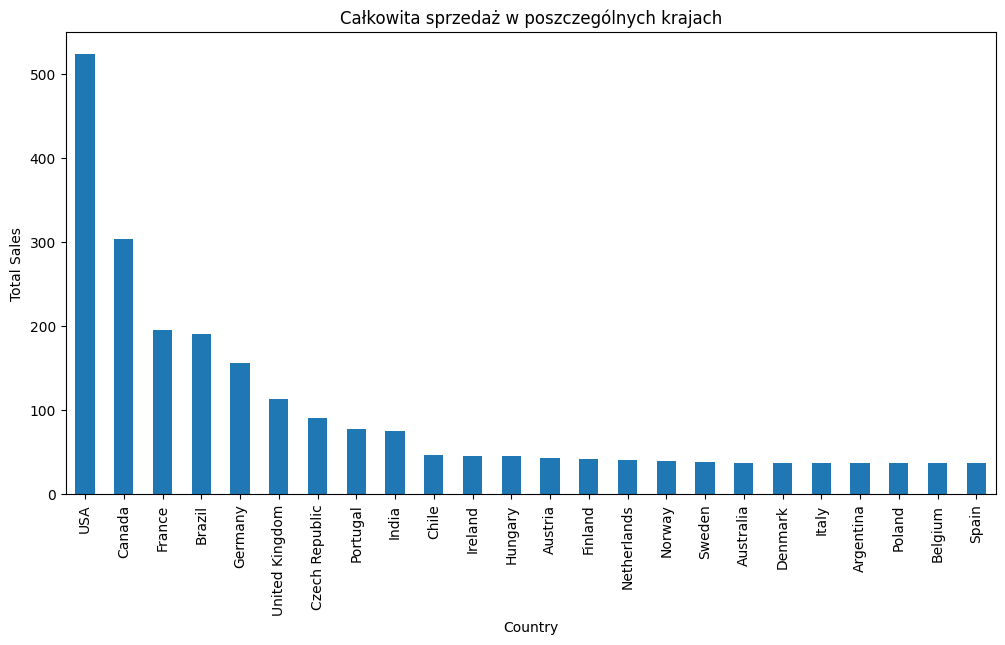

In [576]:
sales_by_country = df_invoices.groupby('BillingCountry')['Total'].sum()
sales_by_country.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title='Całkowita sprzedaż w poszczególnych krajach')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.show()

Wykres: Liczba klientów w poszczególnych krajach

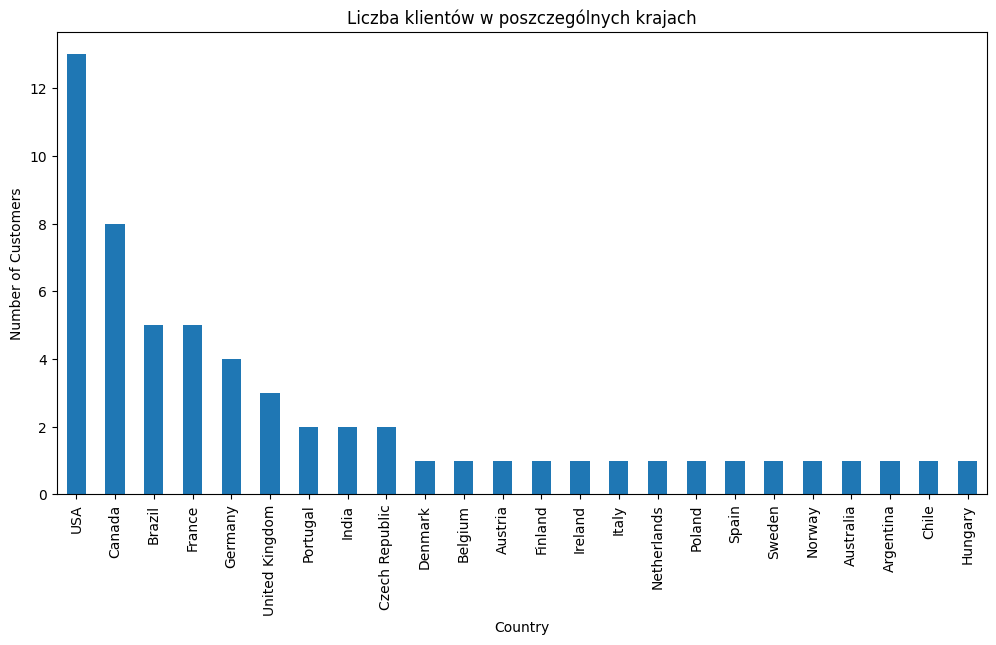

In [577]:
customers_by_country = df_customers['Country'].value_counts()
customers_by_country.plot(kind='bar', figsize=(12, 6), title='Liczba klientów w poszczególnych krajach')
plt.ylabel('Number of Customers')
plt.xlabel('Country')
plt.show()

10 Najczęściej sprzedawanych utworów

Najczęściej sprzedawane utwory:
                         Name  Quantity
1644              The Trooper         5
1739                 Untitled         4
1509      Sure Know Something         4
653      Hallowed Be Thy Name         4
485                  Eruption         4
1621  The Number Of The Beast         4
1350                Sanctuary         3
1517           Sweetest Thing         3
1511                Surrender         3
1282                  Release         3


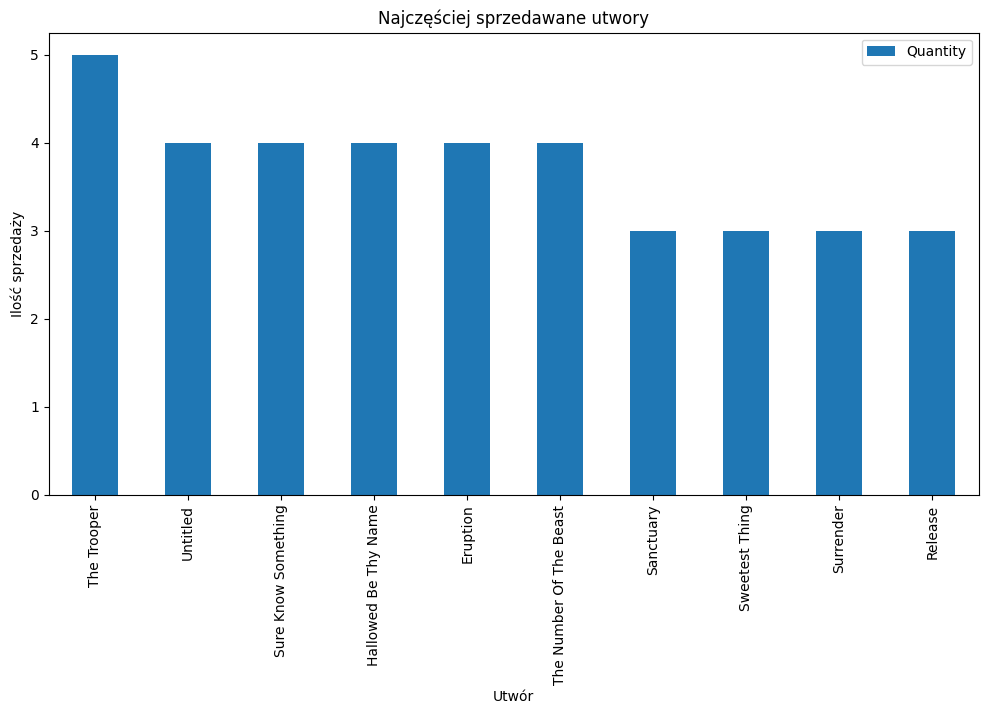

In [578]:
merged_df = pd.merge(df_tracks, df_invoice_items, on='TrackId')

track_sales = merged_df.groupby('Name')['Quantity'].sum().reset_index()
track_sales = track_sales.sort_values(by='Quantity', ascending=False).head(10)
print("Najczęściej sprzedawane utwory:")
print(track_sales)

track_sales.plot(kind='bar', x='Name', y='Quantity', figsize=(12, 6), title='Najczęściej sprzedawane utwory')
plt.ylabel('Ilość sprzedaży')
plt.xlabel('Utwór')
plt.show()

Sprzedaż w czasie

Całkowita sprzedaż w czasie (miesięczna):
InvoiceDate
2009-01-31    35.64
2009-02-28    37.62
2009-03-31    37.62
2009-04-30    37.62
2009-05-31    37.62
Freq: ME, Name: Total, dtype: float64


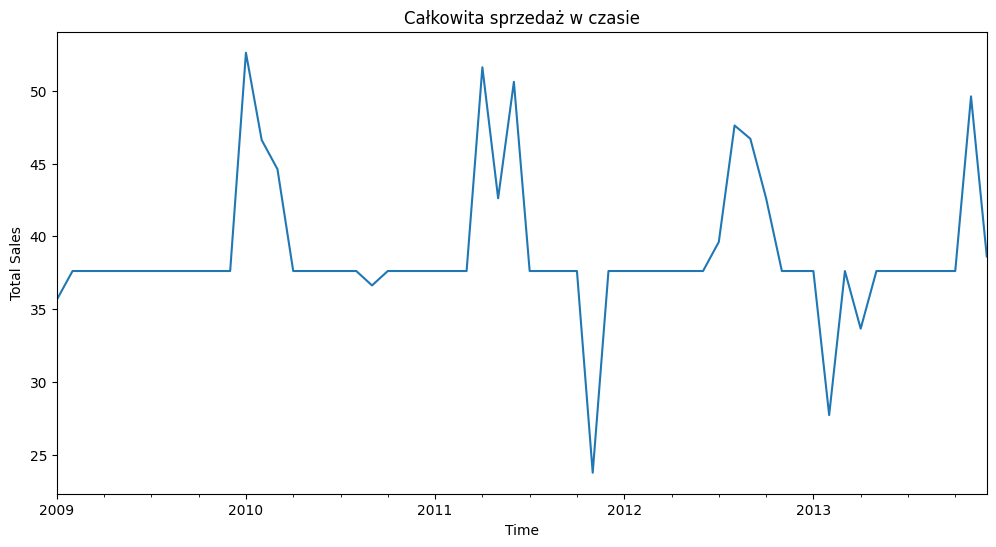

In [579]:
df_invoices['InvoiceDate'] = pd.to_datetime(df_invoices['InvoiceDate'])
sales_over_time = df_invoices.set_index('InvoiceDate').resample('ME')['Total'].sum()
print("Całkowita sprzedaż w czasie (miesięczna):")
print(sales_over_time.head())

sales_over_time.plot(figsize=(12, 6), title='Całkowita sprzedaż w czasie')
plt.ylabel('Total Sales')
plt.xlabel('Time')
plt.show()

Analiza najlepszych sprzedawców

Tabela: Całkowite przychody z podziałem na sprzedawców:
    EmployeeId             FullName_x   Total
45           5            Helena Holý  502.62
39           4     Richard Cunningham  474.62
6            3          Hugh O'Reilly  446.62
9            3        Ladislav Kovács  446.62
53           5             Luis Rojas  415.62
58           5         Victor Stevens  404.62
42           5          Astrid Gruber  404.62
5            3        Fynn Zimmermann  388.62
3            3          Frank Ralston  378.62
31           4  František Wichterlová  376.62
7            3       Isabelle Mercier  376.62
49           5          Julia Barnett  370.62
22           4           Bjørn Hansen  362.62
34           4         João Fernandes  352.62
46           5             Jack Smith  352.62
48           5  Johannes Van der Berg  352.62
18           3       Terhi Hämäläinen  350.62
8            3      Jennifer Peterson  343.62
47           5       Joakim Johansson  340.62
25           4          

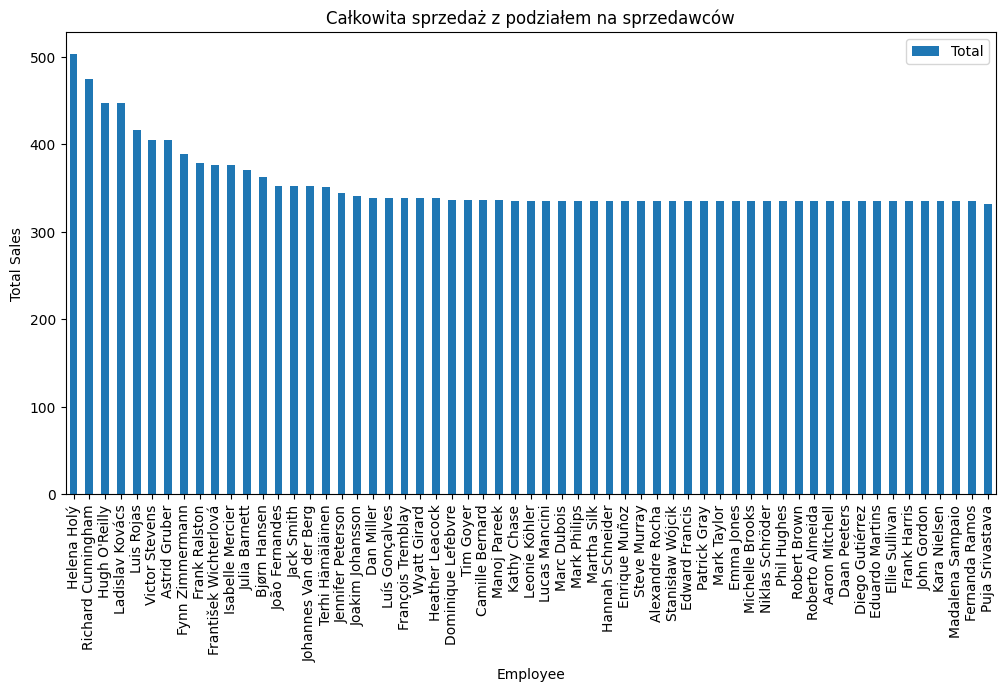

In [580]:
merged_df = pd.merge(df_customers, df_employees, left_on='SupportRepId', right_on='EmployeeId')
merged_df = pd.merge(merged_df, df_invoices, on='CustomerId')
merged_df = pd.merge(merged_df, df_invoice_items, on='InvoiceId')

revenue_per_employee = merged_df.groupby(['EmployeeId', 'FirstName_x', 'LastName_x'])['Total'].sum().reset_index()
revenue_per_employee = revenue_per_employee.sort_values(by='Total', ascending=False)
revenue_per_employee['FullName_x'] = revenue_per_employee['FirstName_x'] + ' ' + revenue_per_employee['LastName_x']
revenue_per_employee = revenue_per_employee[['EmployeeId', 'FullName_x', 'Total']]

print("Tabela: Całkowite przychody z podziałem na sprzedawców:")
print(revenue_per_employee)

revenue_per_employee.to_csv('revenue_per_employee.csv', index=False)

revenue_per_employee.plot(kind='bar', x='FullName_x', y='Total', figsize=(12, 6), title='Całkowita sprzedaż z podziałem na sprzedawców')
plt.ylabel('Total Sales')
plt.xlabel('Employee')
plt.show()


 Zamknięcie połączenia z bazą danych

In [581]:
conn.close()